# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

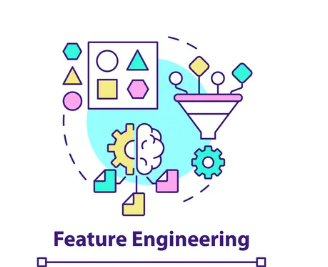

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [1]:
# Write your solution here
import pandas as pd
import numpy as np
df = pd.read_csv('loan_train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [2]:
ndf = df.select_dtypes(include=[np.number])
ndf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [3]:
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer( missing_values=np.nan, strategy='mean')
new_ndf = imputeC.fit_transform(ndf)
new_ndf

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [4]:
new_data = pd.DataFrame(data=new_ndf,columns=ndf.columns)
new_data
# new_data.isnull().sum()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

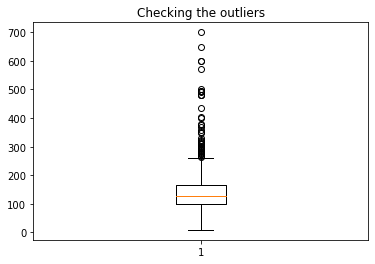

In [5]:
#Write your solution here
import matplotlib.pyplot as plt
plt.boxplot(new_data['LoanAmount'])
plt.title('Checking the outliers')
plt.show()

In [23]:
#Remove Outliers
Q1 = new_data['LoanAmount'].quantile(0.25)
Q3 = new_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5 * IQR
upper_bound = Q3+1.5 * IQR
ls = new_data.index[(new_data['LoanAmount'] < lower_bound) & (new_data['LoanAmount'] > upper_bound)]
new_data.drop(ls,inplace=True)
new_data


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
608           3232.0             1950.0  108.000000             360.0   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
608             1.0  
609             1.0  
610             1.0  
612             1.0  
613             0.0  

[553 rows x 5 columns]

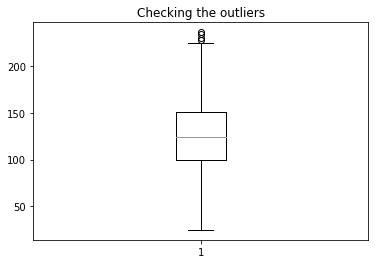

In [22]:
import matplotlib.pyplot as plt
plt.boxplot(new_data['LoanAmount'])
plt.title('Checking the outliers')
plt.show()



## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

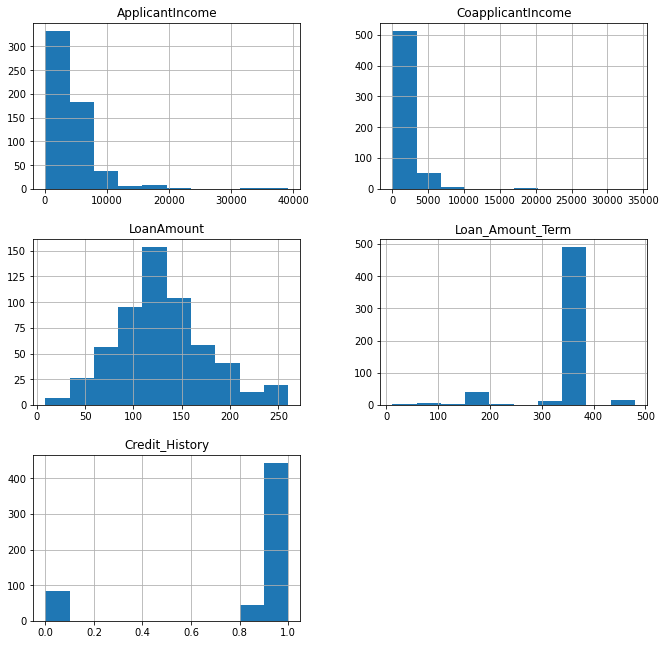

In [8]:
new_data[new_data.dtypes[(new_data.dtypes=="float64")|(new_data.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()


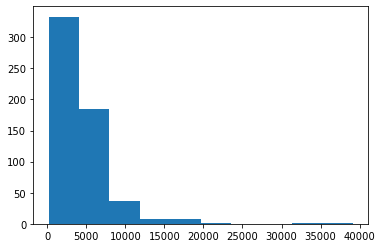

In [9]:
# Write your solution here
plt.hist(new_data.ApplicantIncome)
plt.show()


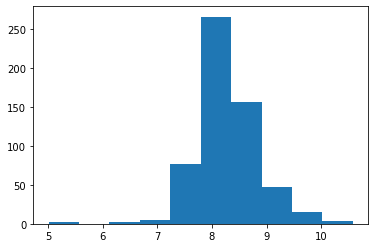

In [10]:
#logarithimic Transformation
x = np.log(new_data.ApplicantIncome)
plt.hist(x)
plt.show()

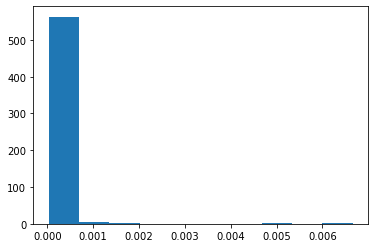

In [11]:
#reciprocal
x = np.reciprocal(new_data.ApplicantIncome)
plt.hist(x)
plt.show()

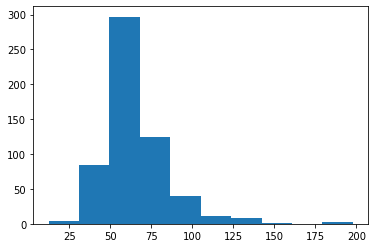

In [12]:
#– Square root Transformation
x = np.sqrt(new_data.ApplicantIncome)
plt.hist(x)
plt.show()

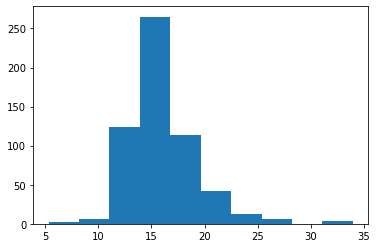

In [13]:
x = np.cbrt(new_data.ApplicantIncome)
plt.hist(x)
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [14]:
# Write your solution here
# min-max scaler
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
numric = min_max.fit_transform(new_data)
pd.DataFrame(numric,columns=new_data.columns)



ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.146139           0.000000    0.547459          0.743590   
1           0.113675           0.044567    0.474104          0.743590   
2           0.073083           0.000000    0.227092          0.743590   
3           0.062389           0.069687    0.442231          0.743590   
4           0.150012           0.000000    0.525896          0.743590   
..               ...                ...         ...               ...   
568         0.070518           0.000000    0.247012          0.743590   
569         0.101444           0.000000    0.123506          0.358974   
570         0.203144           0.007093    0.972112          0.743590   
571         0.190604           0.000000    0.709163          0.743590   
572         0.113675           0.000000    0.494024          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
568             1.0  
569             1.0  
570             1.0  
571             1.0  
572             0.0  

[573 rows x 5 columns]

In [15]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numric  = scaler.fit_transform(new_data)
pd.DataFrame(numric,columns=new_data.columns)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.328911          -0.630154    0.370646          0.278520   
1          -0.018351           0.012474   -0.025618          0.278520   
2          -0.452565          -0.630154   -1.359976          0.278520   
3          -0.566948           0.374698   -0.197794          0.278520   
4           0.370330          -0.630154    0.254166          0.278520   
..               ...                ...         ...               ...   
568        -0.479995          -0.630154   -1.252367          0.278520   
569        -0.149191          -0.630154   -1.919546         -2.501832   
570         0.938677          -0.527879    2.664619          0.278520   
571         0.804545          -0.630154    1.244174          0.278520   
572        -0.018351          -0.630154    0.081991          0.278520   

     Credit_History  
0          0.452826  
1          0.452826  
2          0.452826  
3          0.452826  
4          0.452826  
..              ...  
568        0.452826  
569        0.452826  
570        0.452826  
571        0.452826  
572       -2.395324  

[573 rows x 5 columns]

In [16]:
#Robust Scaler 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numric = scaler.fit_transform(new_data)
pd.DataFrame(numric,columns=new_data.columns)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.869811          -0.544309    0.389312               0.0   
1           0.359532           0.134053    0.054545               0.0   
2          -0.278517          -0.544309   -1.072727               0.0   
3          -0.446594           0.516419   -0.090909               0.0   
4           0.930673          -0.544309    0.290909               0.0   
..               ...                ...         ...               ...   
568        -0.318823          -0.544309   -0.981818               0.0   
569         0.167271          -0.544309   -1.545455            -180.0   
570         1.765820          -0.436347    2.327273               0.0   
571         1.568722          -0.544309    1.127273               0.0   
572         0.359532          -0.544309    0.145455               0.0   

     Credit_History  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
568             0.0  
569             0.0  
570             0.0  
571             0.0  
572            -1.0  

[573 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [17]:
# Write your solution here





## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [18]:
#Write your solution here



# <center>THANK YOU